# Notebook to show application of trained model to sims (or data if loaded)

In [1]:
%matplotlib inline
import numpy as np
import time
from tensorflow.keras.models import load_model
import os, sys
import scipy.ndimage as ndimage
from scipy.stats import pearsonr
import scipy.stats as stats
import scipy.ndimage as ndimage

import gc

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from deepmass import map_functions as mf
from deepmass import lens_data as ld
from deepmass import wiener

In [4]:
trained_model_file = '../outputs/h5_files/model_DeepMass.h5'
model = load_model(trained_model_file)

/Users/ucapnje/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


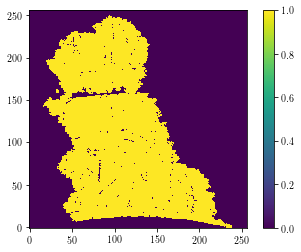

In [5]:
sv_mask = np.float32(np.real(np.where(np.load('../picola_training/Ncov.npy') > 1.0, 0.0, 1.0)))
_ = plt.imshow(sv_mask, origin='lower', clim=(0,1)), plt.colorbar()

In [6]:
wiener_array = np.load('../picola_training/validation_data/test_array_wiener.npy')[:400]
gc.collect()

7

In [7]:
clean_array = np.load('../picola_training/validation_data/test_array_clean.npy')[:400]
gc.collect()

3

# Apply model

In [8]:
t=time.time()
output_array = model.predict(wiener_array)
gc.collect()
print(time.time() -t)

120.47561120986938


/Users/ucapnje/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


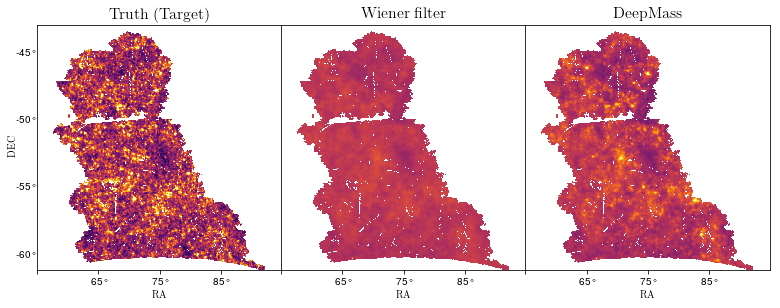

In [9]:
xticks=[None,'65°','75°','85°']
yticks=[]

extent=(0,4,0,4)
_ = plt.figure(figsize =(15,4.5))
_ = plt.subplot(1,3,1), plt.title(r'${\rm Truth\ (Target)}$', fontsize=16)
_ = plt.imshow(np.where(sv_mask!=0.,
                        (ndimage.gaussian_filter(clean_array[0,:,:,0], sigma=0.5) -0.5)/3.
                        ,np.nan), origin='lower',extent=extent,
               cmap='inferno', clim = (-0.025,0.025))

_ =plt.xticks( np.arange(len(xticks)), xticks)
_ =plt.yticks( np.arange(len(yticks)), None)

plt.text(-0.35,0.2,'-60°')
plt.text(-0.35,1.3,'-55°')
plt.text(-0.35,2.4,'-50°')
plt.text(-0.35,3.5,'-45°')

plt.xlabel(r'${\rm RA}$')
plt.ylabel(r'${\rm DEC}$', labelpad = 20.)

_ = plt.subplot(1,3,2), plt.title(r'${\rm Wiener\ filter}$', fontsize=16)
_ = plt.imshow(np.where(sv_mask!=0.,
                        (ndimage.gaussian_filter(wiener_array[0,:,:,0], sigma=0.5) -0.5)/3.
                        ,np.nan), origin='lower',extent=extent,
               cmap='inferno', clim = (-0.025,0.025))

_ =plt.xticks( np.arange(len(xticks)), xticks)
_ =plt.yticks( np.arange(len(yticks)), None)
plt.xlabel(r'${\rm RA}$')

_ = plt.subplot(1,3,3), plt.title(r'${\rm DeepMass}$', fontsize=16)
_ = plt.imshow(np.where(sv_mask!=0.,
                        (ndimage.gaussian_filter(output_array[0,:,:,0], sigma=0.5) -0.5)/3.,
                        np.nan), origin='lower',extent=extent,
               cmap='inferno',  clim = (-0.025,0.025))
_ =plt.xticks( np.arange(len(xticks)), xticks)
_ =plt.yticks( np.arange(len(yticks)), None)
plt.xlabel(r'${\rm RA}$')

plt.subplots_adjust(wspace=-0.3)